In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

def symmetrize(matrix):
    """Symmetrize an upper triangular matrix."""
    return matrix + matrix.T - np.diag(matrix.diagonal())


# In this notebook, we will analyze the two body interaction within the deuteron. We operate in the realm of ab initio nuclear structure physics and
# want to especially focus on the difference of the relative harmonic oscillator basis vs the relative momentum basis. Especially the problem of 
# convergence in regards to trunctuation and the grid size will be discussed.

test_data = pd.read_csv(r"C:\Users\Elias Enrique Hamel\Documents\TUDarmstadt\Master\NuclearStructure\code_git\comp_nuclear_structure_physics2025\Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO010.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO010.meho", sep = r"\s+", header = None, skiprows = 1)
#test_data = pd.read_csv(r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO018.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO018.meho",  sep = r"\s+", header = None, skiprows = 1)

test_data = test_data.rename(columns = {0: "N", 1: "L", 2: "N'", 3:"L'", 4:"S", 5:"J", 6: "T", 7:"MT", 8:"E"})
print(test_data)
test_data = test_data.loc[(test_data['J'] == 1) & (test_data['S'] == 1) & (test_data['T'] == 0) & (test_data['MT'] == 0)]
#test_data = test_data.loc[(test_data['L'] == 0) & (test_data["L'"] == 2) | (test_data['L'] == 2) & (test_data["L'"] == 0)]
#test_data = test_data.drop(columns=["S", "J", "T", "MT"])
test_data = test_data.sort_values(['L',"L'"])
# save the data
test_data.to_csv("test_data.csv")
print(test_data)

          N  L   N'  L'  S  J  T  MT         E
0         0  0    0   0  0  0  1  -1 -4.251095
1         0  0    0   0  0  0  1   0 -4.370558
2         0  0    0   0  0  0  1   1 -3.658270
3         0  0    0   0  1  1  0   0 -3.116765
4         0  0    0   2  1  1  0   0 -3.346249
...     ... ..  ...  .. .. .. ..  ..       ...
108166  100  2  100   2  0  2  1  -1 -0.527359
108167  100  2  100   2  0  2  1   0 -0.529225
108168  100  2  100   2  0  2  1   1 -0.456814
108169  100  2  100   2  1  1  0   0 -0.048394
108170  100  2  100   2  1  2  0   0 -0.850997

[108171 rows x 9 columns]
          N  L   N'  L'  S  J  T  MT         E
3         0  0    0   0  1  1  0   0 -3.116765
8         0  0    1   0  1  1  0   0 -2.789157
13        0  0    2   0  1  1  0   0 -2.298650
18        0  0    3   0  1  1  0   0 -1.810910
23        0  0    4   0  1  1  0   0 -1.359715
...     ... ..  ...  .. .. .. ..  ..       ...
108100   98  2   99   2  1  1  0   0 -0.050105
108106   98  2  100   2  1  1  0 

[[-3.11676486e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.78915654e+00 -2.71817197e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.29864982e+00 -2.29662988e+00 -1.99645207e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 4.74122200e-03  2.91772826e-02  5.65589420e-02 ... -4.10093160e-01
   0.00000000e+00  0.00000000e+00]
 [-2.18601300e-04  2.24564637e-02  4.84421620e-02 ... -4.08104377e-01
  -4.06800781e-01  0.00000000e+00]
 [-4.90940300e-03  1.60780820e-02  4.07174781e-02 ... -4.05464033e-01
  -4.04837342e-01 -4.03547034e-01]]


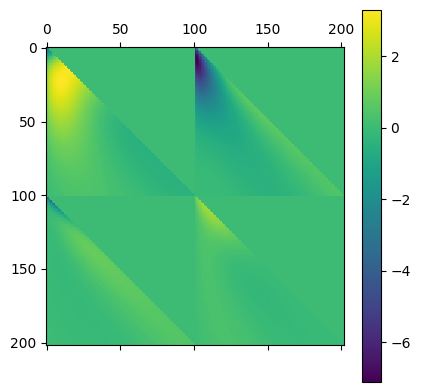

Is the Hamiltonian Hermitian after symmetrization? False


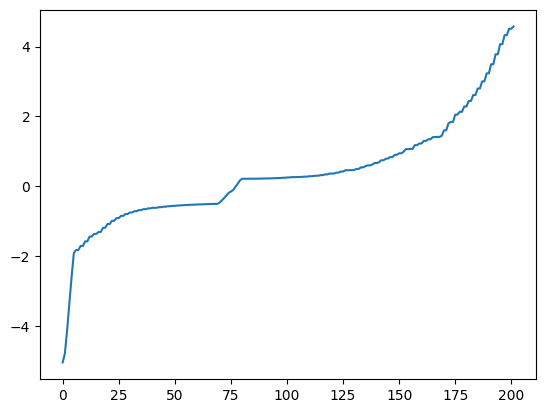

(-5.052063736268897+0j)
[-5.05206374+0.j         -4.79382735+0.j         -4.12104038+0.j
 -3.35253289+0.j         -2.59069683+0.j         -1.91470217+0.j
 -1.82857458-0.1674828j  -1.82857458+0.1674828j  -1.71294998-0.34741747j
 -1.71294998+0.34741747j -1.58175608-0.47843603j -1.58175608+0.47843603j
 -1.44467107-0.56406654j -1.44467107+0.56406654j -1.36764165-0.14721932j
 -1.36764165+0.14721932j -1.31167432-0.61110174j -1.31167432+0.61110174j
 -1.18974998-0.62798405j -1.18974998+0.62798405j -1.08251   -0.62317306j
 -1.08251   +0.62317306j -0.99084215-0.60396531j -0.99084215+0.60396531j
 -0.91387531-0.57601795j -0.91387531+0.57601795j -0.84986003-0.54336271j
 -0.84986003+0.54336271j -0.79677867-0.50868687j -0.79677867+0.50868687j
 -0.75268439-0.47366972j -0.75268439+0.47366972j -0.71586741-0.43927778j
 -0.71586741+0.43927778j -0.68491794-0.4060087j  -0.68491794+0.4060087j
 -0.65871685-0.37407961j -0.65871685+0.37407961j -0.63638739-0.34355168j
 -0.63638739+0.34355168j -0.61971947+0.j    

In [51]:
# Since we especially target the deuteron ground state, we filtered according to all the fixed angular momentum quantum numbers
# We will follow by creating a block diagonal matrix where the upper left inner matrix will be (L=0, L'=0), the upper right (L=0, L'=2) the lower left (L=2,L'=0) and the lower right (L=2;L'=2)


# Extract submatrices
E_00 = test_data[(test_data['L'] == 0) & (test_data["L'"] == 0)].pivot(index="N'", columns="N", values='E').fillna(0).values
# Save E00 to txt
np.savetxt("E00.txt", E_00)
print(E_00)
E_02 = test_data[(test_data['L'] == 0) & (test_data["L'"] == 2)].pivot(index="N'", columns="N", values='E').fillna(0).values
E_20 = test_data[(test_data['L'] == 2) & (test_data["L'"] == 0)].pivot(index="N'", columns="N", values='E').fillna(0).values
E_22 = test_data[(test_data['L'] == 2) & (test_data["L'"] == 2)].pivot(index="N'", columns="N", values='E').fillna(0).values
# E_00 = symmetrize(E_00)
# E_02 = symmetrize(E_02)
# E_20 = symmetrize(E_20)
# E_22 = symmetrize(E_22)
# Create block diagonal matrix
E_matrix = np.block([[E_00, E_02], [E_20, E_22]])
E_matrix[:E_00.shape[0], E_00.shape[1]:] = E_02
E_matrix[E_00.shape[0]:, :E_00.shape[1]] = E_20

# Plot matrix
plt.matshow(E_matrix)
plt.colorbar()
plt.show()

# # Validate symmetry of submatrices
# print("E_20 vs. E_02^T:")
# print(np.allclose(E_20, E_02.T))

# # Combine submatrices into block Hamiltonian
H = np.block([[E_00, E_02], [E_20, E_22]])
# Check if the Hamiltonian is now Hermitian
is_hermitian = np.allclose(H, H.T)
print(f"Is the Hamiltonian Hermitian after symmetrization? {is_hermitian}")
# plt.matshow(H)
# plt.colorbar()
# plt.show()
# # Check if the full matrix is Hermitian
# is_hermitian = np.allclose(H, H.T)
# print(f"Is the Hamiltonian Hermitian? {is_hermitian}")

# print("Unique N values:", test_data["N"].unique())
# print("Unique N' values:", test_data["N'"].unique())
# print("Unique L values:", test_data["L"].unique())
# print("Unique L' values:", test_data["L'"].unique())


# expected_pairs = set((N, Np) for N in range(101) for Np in range(101))
# actual_pairs = set(zip(test_data["N"], test_data["N'"]))
# missing_pairs = expected_pairs - actual_pairs
# print("Missing pairs:", missing_pairs)

# Since we are interested in the convergence of the relative harmonic oscillator basis, we will plot the eigenvalues of the matrix as a function of the number of basis states
# included in the calculation. We will start with a low number of basis states and increase the number of basis states until we reach a convergence.

# Solve the eigenvalue problem for the entire untrunctated matrix
eigenvalues, eigenvectors = np.linalg.eig(E_matrix)
eigenvalues = np.sort(eigenvalues)
plt.plot(eigenvalues)
plt.show()

# print the smallest eigenvalue
print(eigenvalues[0])
print(eigenvalues)


